<a href="https://colab.research.google.com/github/SujitbMusale/Supervised-ML-Regression--Seoul-Bike-Sharing-Demand-Prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#Read Required Libararies for project.





In [1]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read CSV file.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read CSV File required for Project.

In [3]:
Bike_data= pd.read_csv('/content/drive/MyDrive/almabetter/csv files/SeoulBikeData.csv',encoding = 'ISO-8859-1')

# Data cleaning

In [4]:
Bike_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
Bike_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
Bike_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
# To check null values in Rows.
Bike_data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
# to check the info for type of variable present inside data
Bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
# To check for duplicate present in data set
len(Bike_data[Bike_data.duplicated()])

0

To chcek the shape of data

In [10]:
# to check the distribution of Dependent variable 
print(f' The shape of dataset is {(Bike_data.shape)} \n Total Rows are : {(Bike_data.shape)[0]}\n Total Columns are : {(Bike_data.shape)[1]}')

 The shape of dataset is (8760, 14) 
 Total Rows are : 8760
 Total Columns are : 14


Some columns name are not in prpoer format which are required for variable so, convert them in to proper format.

In [11]:
Bike_data.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature',
                          'Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature',
                        'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall',
                        'Functioning Day':'Functioning_Day'},inplace=True)

In [12]:
Bike_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [13]:
# lets check the date format present in the given data
type(Bike_data['Date'][0])

str

In [14]:
# lets convert the date format from str to date time format.
Bike_data['Date']=Bike_data['Date'].astype('datetime64[ns]')


In [15]:
# create the month variable for analysis purpose
Bike_data['Month']=Bike_data['Date'].dt.month


In [16]:
# adding new columns to data 1 is for weekend and 0 is for week days
Bike_data['Day']=Bike_data['Date'].dt.day_name() 
Bike_data['Weekdays_or_weekend']= Bike_data['Day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)


In [17]:
# droping the date and day columns from data
Bike_data.drop(['Date',"Day"],axis=1 ,inplace=True)

#EDA

* Variable Decleration
  n_var = numerical variable,
  c_var = categorical variable

In [18]:
# lets create the list of numerical and catogarical columns
n_var=list(Bike_data.describe().columns.tolist())
c_var= list(set(Bike_data.columns.tolist())-set(n_var))
c_var.extend(['Month','Weekdays_or_weekend'])

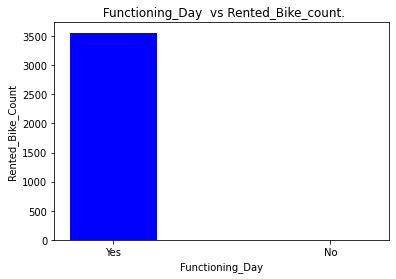

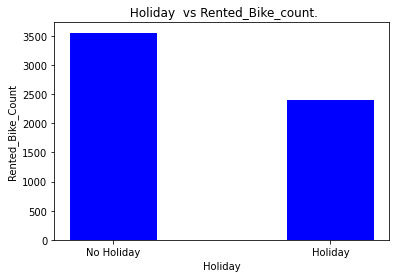

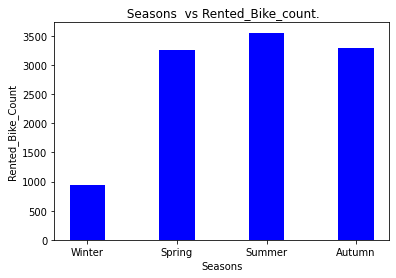

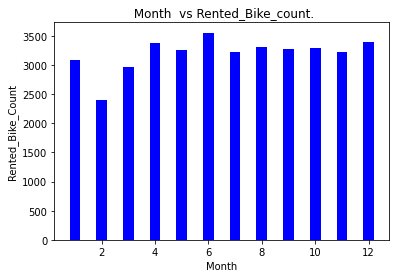

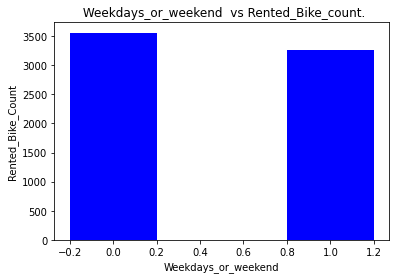

In [21]:

for var in c_var:
  plt.bar(Bike_data[var], Bike_data['Rented_Bike_Count'],color ='blue',width = 0.4)
  plt.xlabel(var)
  plt.ylabel("Rented_Bike_Count")
  plt.title(f" {var}  vs Rented_Bike_count.")
  #print(f" {var}  vs Rented_Bike_count.")
  plt.show()

some points are observed from above bar plot

1.   We can observe from Winter season is having low count of bike rent and summer season is having high count as compared to other so, we can say that people are like to take the bike on rent in summer season.
2.   totla Bike rented in weak days and in weakend are near about equals.
3.   total count of bike rented in No holidays days are greater than total count of bike rented in holideays.
4.   in feb the bike rent count is low while in jun and dec the count is high.



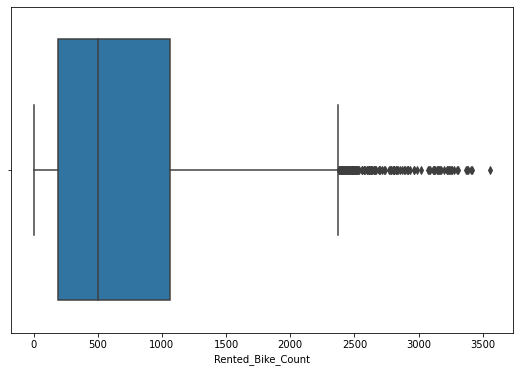

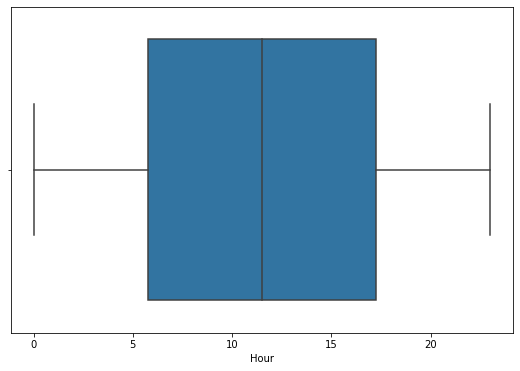

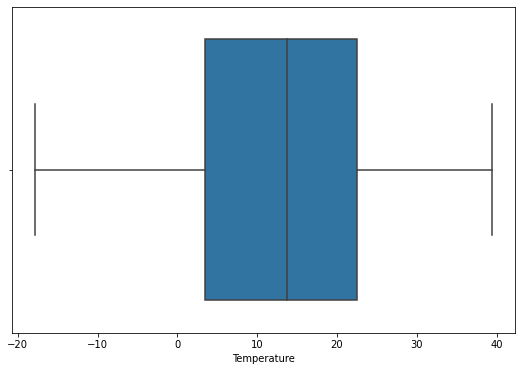

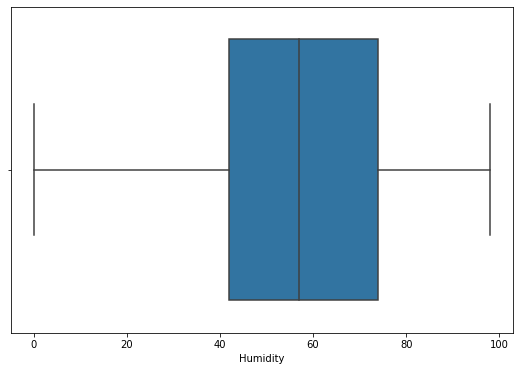

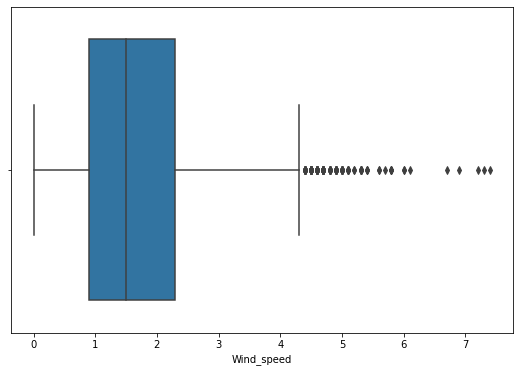

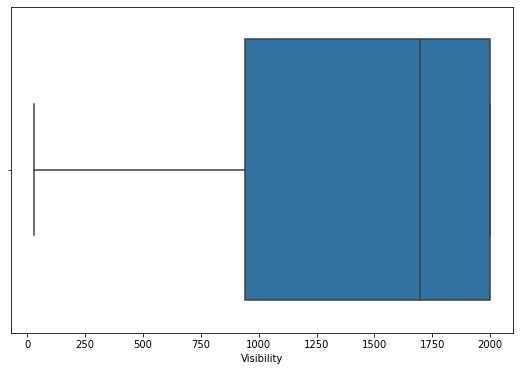

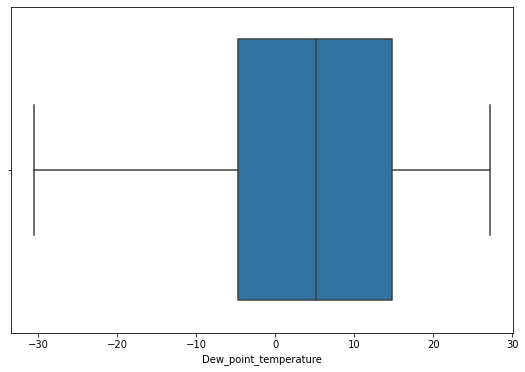

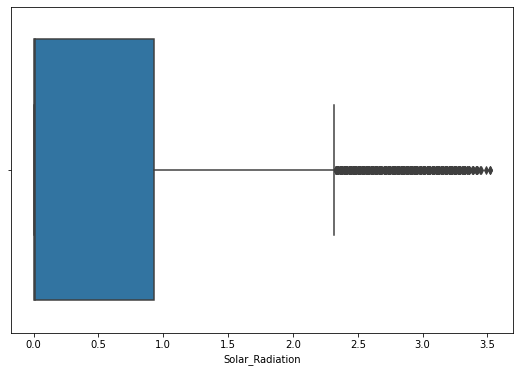

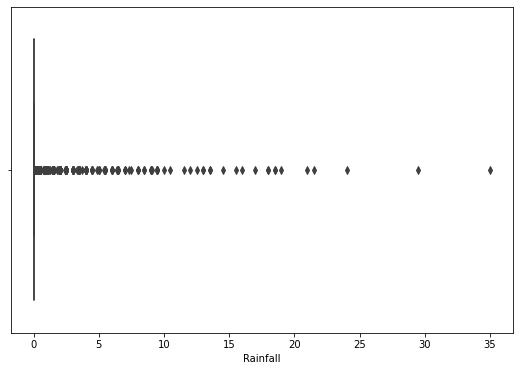

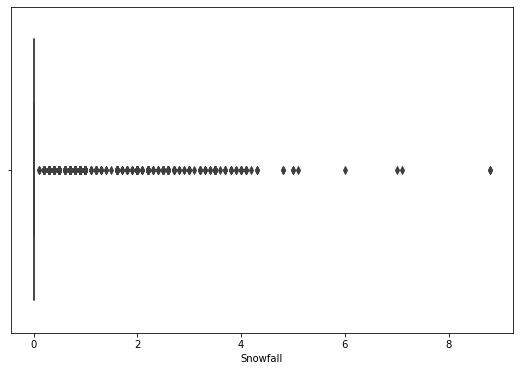

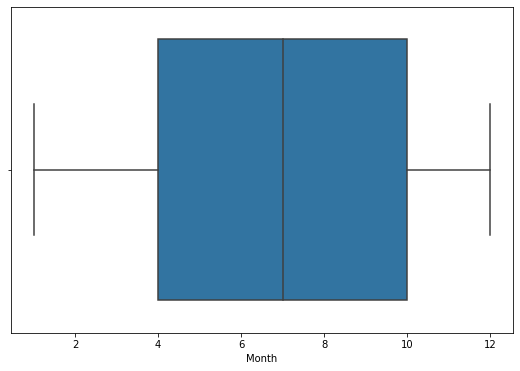

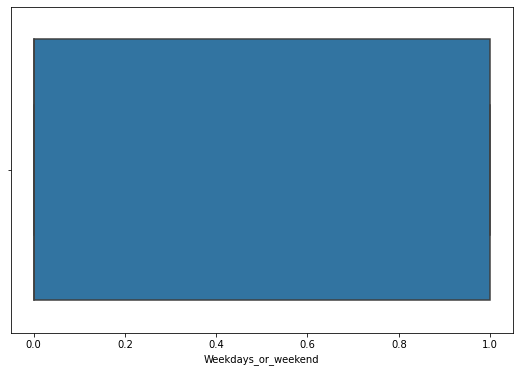

In [23]:
# lets plot the box plot to check the outliers avilable in numeric data.
for var in n_var:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()   
    sns.boxplot(x=Bike_data[var])

From above box plot we can see below listed observations.
1.   Snowfall is having some outliers.
2.   Rainfall also having some outliers.
3.   Solar_Radiation also having Some outliers.



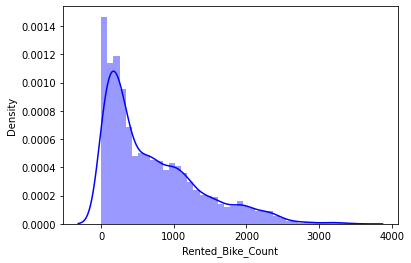

In [33]:
# lets chcek the distribution of target variables -'Bike_rent_count'.
sns.distplot(Bike_data['Rented_Bike_Count'],kde=True,color='blue')

Target variable is slightly right skewed

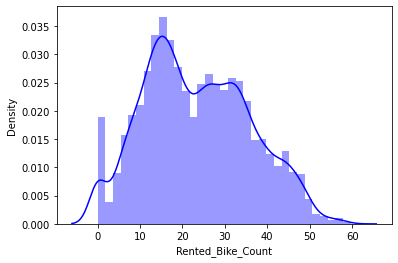

In [34]:
# to get normal distribution we have to do normalization and we will used squre root method
sns.distplot(np.sqrt(Bike_data['Rented_Bike_Count']),kde=True,color='blue')

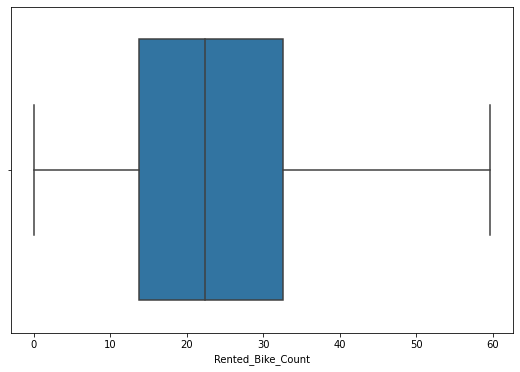

In [36]:
# also check for outliers by using box plot
plt.figure(figsize=(9, 6))
fig.gca()   
sns.boxplot(x=np.sqrt(Bike_data['Rented_Bike_Count']))

By observing above two graph we can say that now data is normalized, as ther is normal distribution in dist plot and no outliers in box plot.

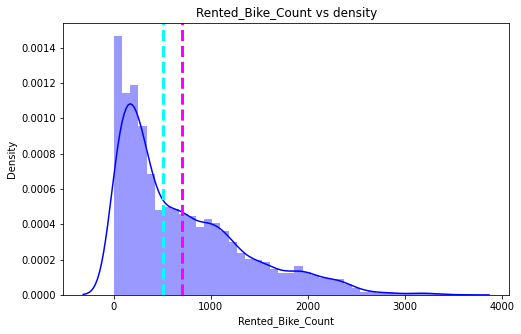

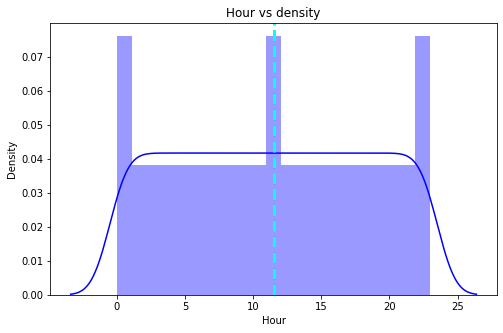

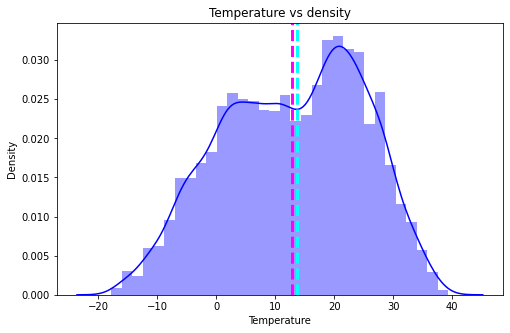

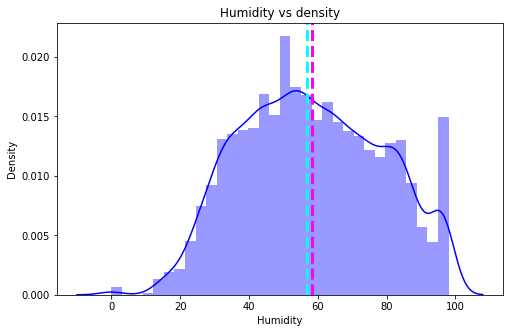

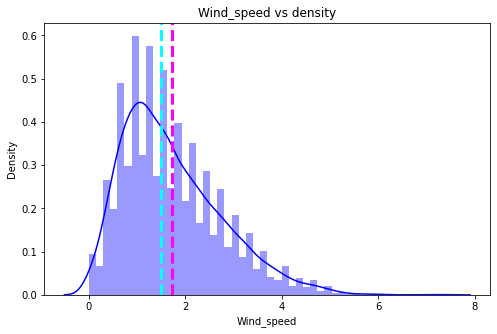

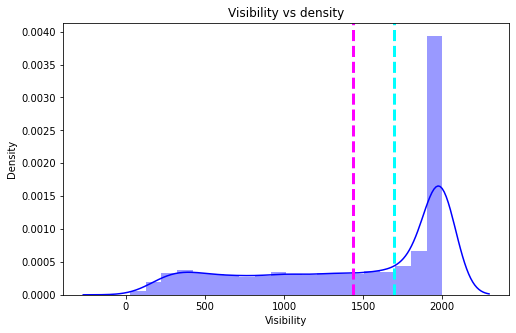

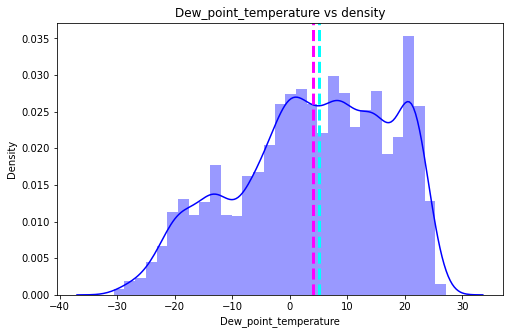

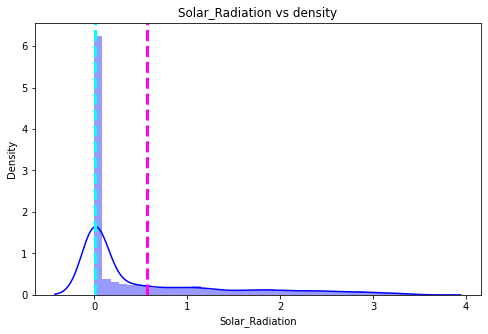

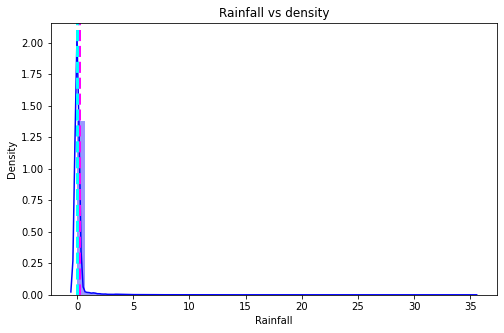

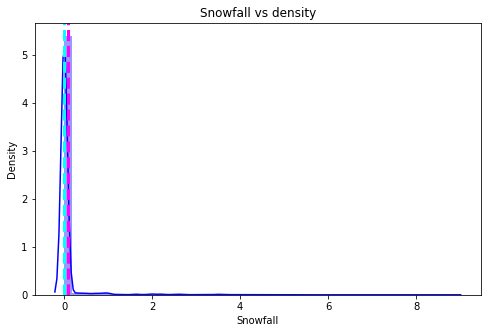

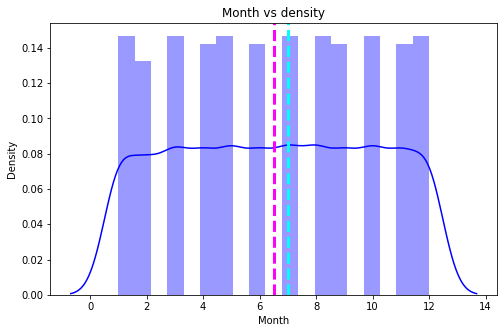

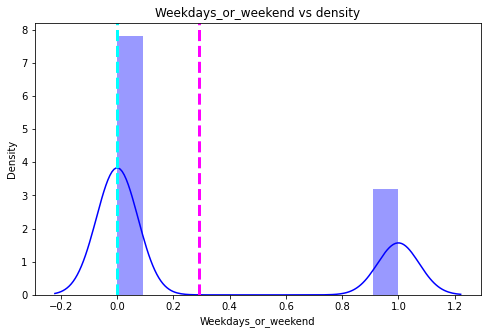

In [43]:
# lets check the distribution of independent variables.
for col in n_var:
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    sns.distplot(Bike_data[col],kde=True,color='blue')
    ax.axvline(Bike_data[col].mean(), color='magenta', linestyle='dashed', linewidth=3)
    ax.axvline(Bike_data[col].median(), color='cyan', linestyle='dashed', linewidth=3)    
    ax.set_title(f'{col} vs density')
plt.show()

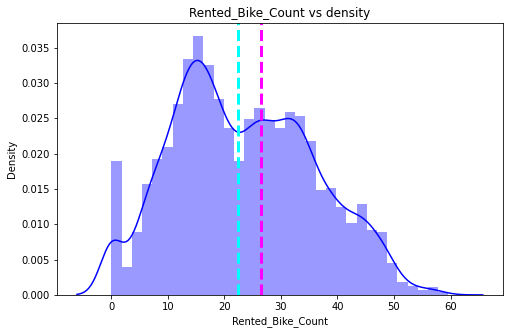

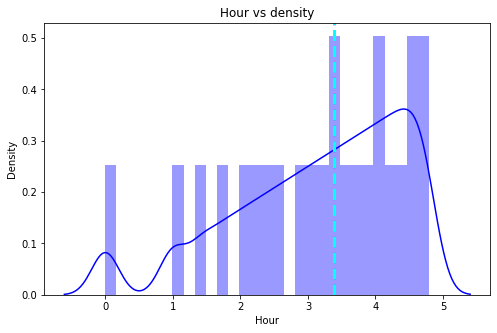

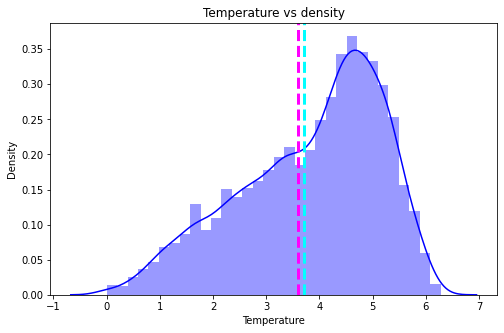

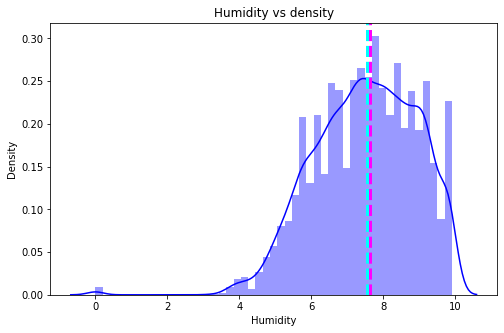

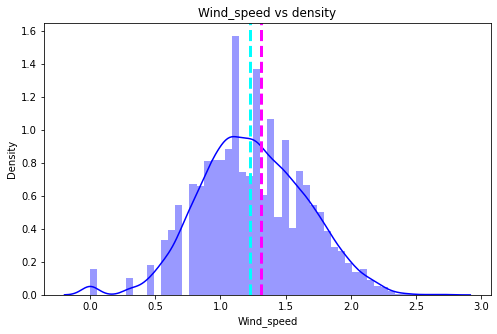

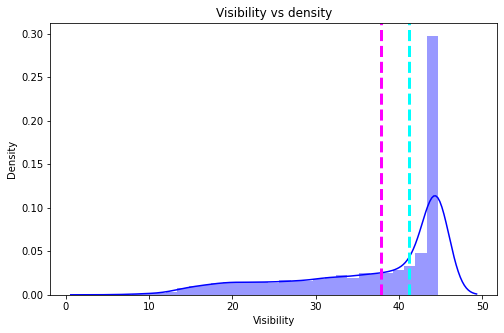

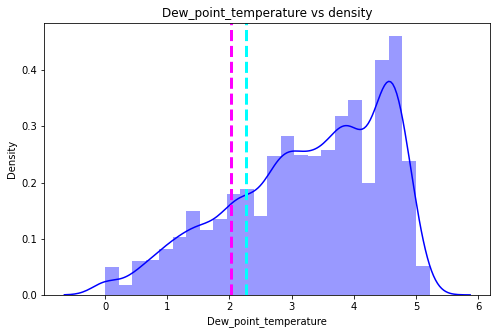

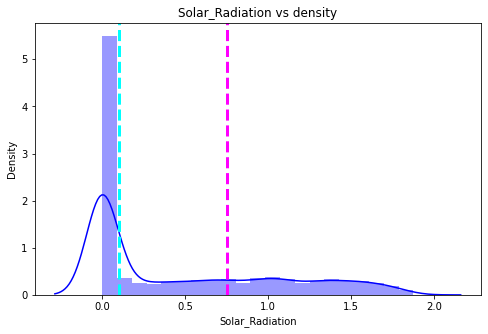

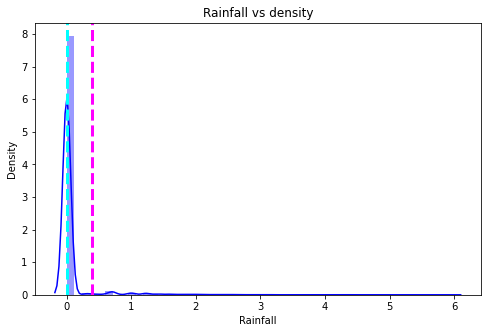

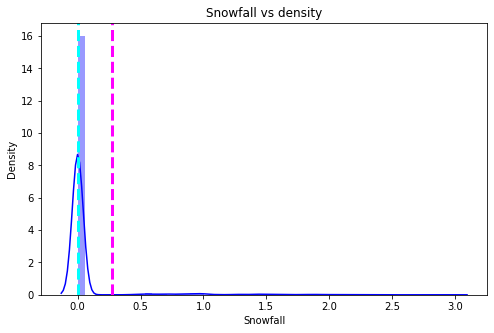

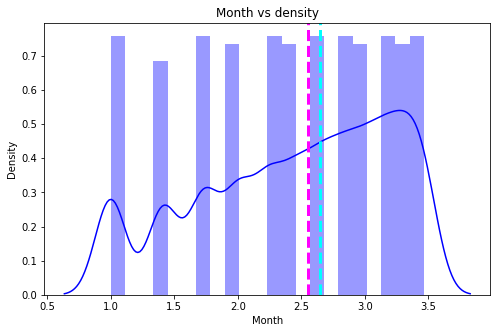

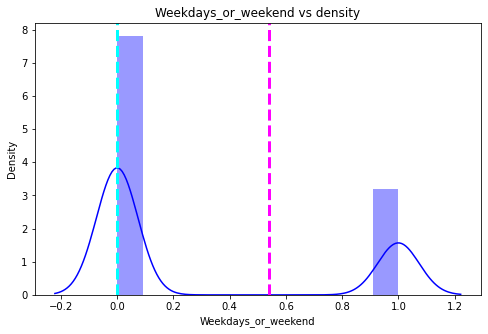

In [44]:
# normalizing the independent variable by using squre root method
for col in n_var:
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    sns.distplot(np.sqrt(Bike_data[col]),kde=True,color='blue')
    ax.axvline(np.sqrt(Bike_data[col].mean()), color='magenta', linestyle='dashed', linewidth=3)
    ax.axvline(np.sqrt(Bike_data[col].median()), color='cyan', linestyle='dashed', linewidth=3)    
    ax.set_title(f'{col} vs density')
plt.show()

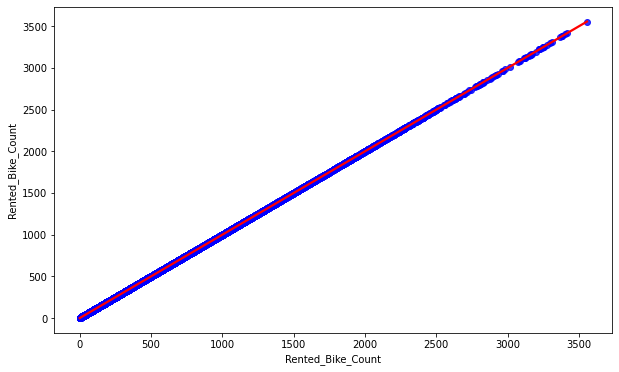

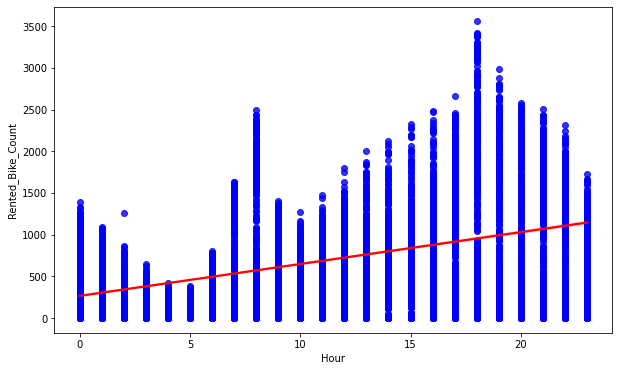

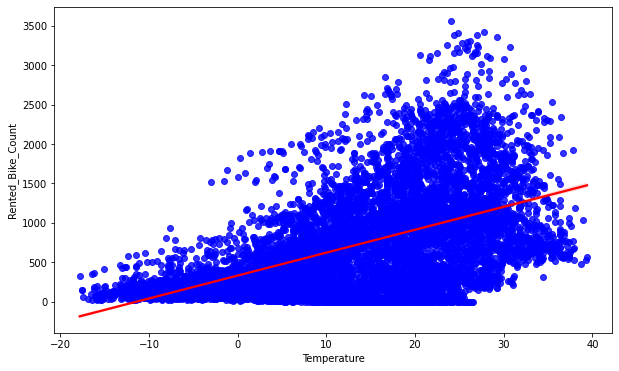

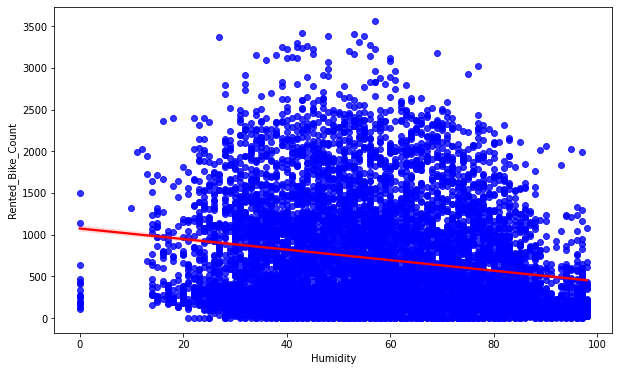

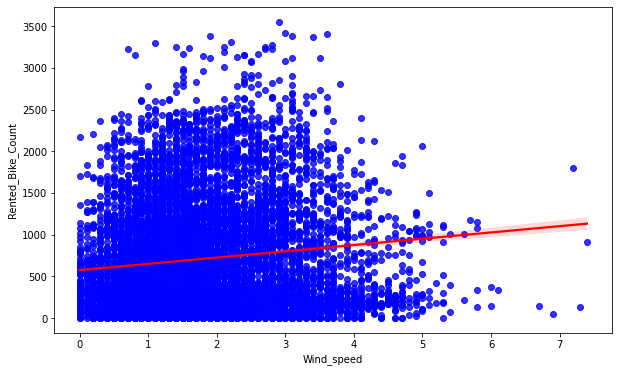

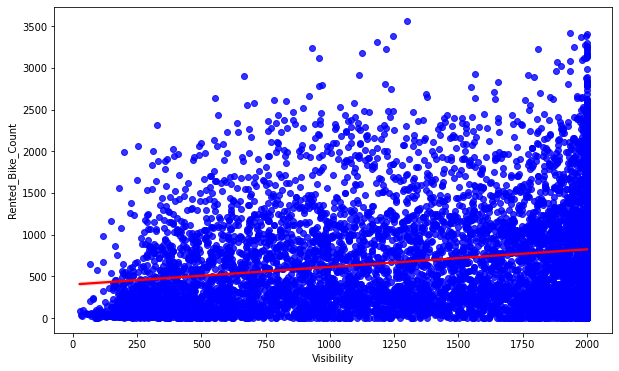

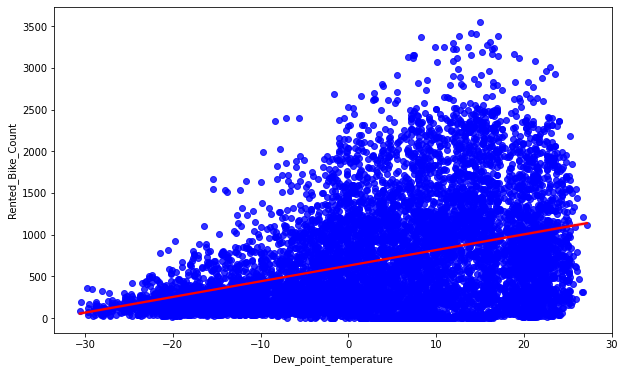

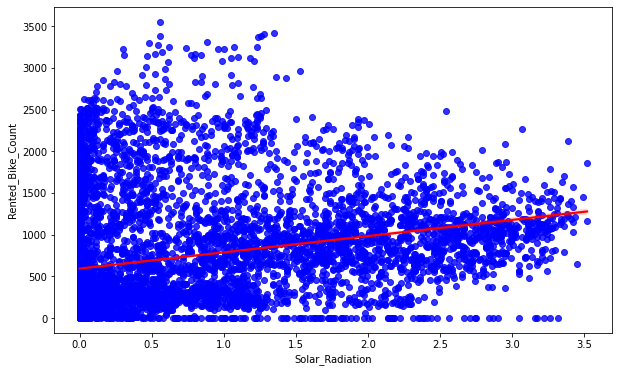

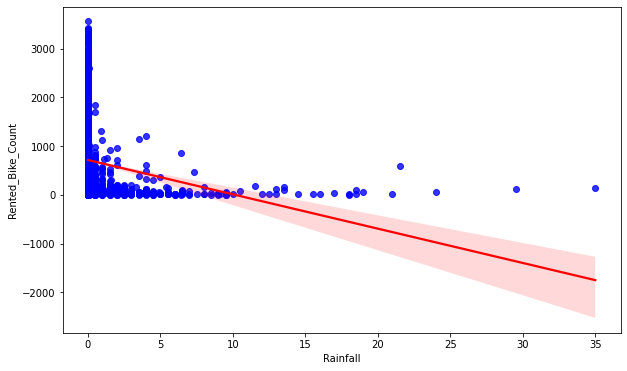

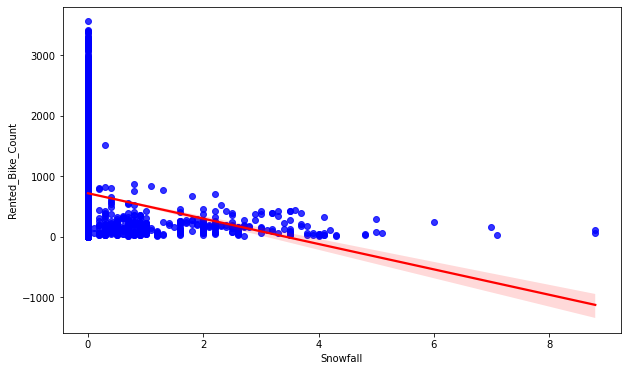

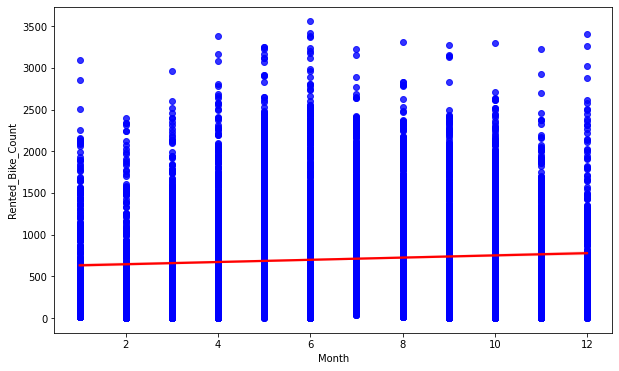

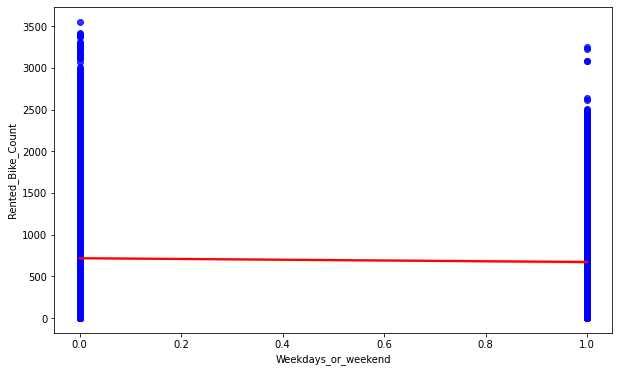

In [52]:
# lets check the relation between our dependent var and independent variable.
for var in n_var:
  plt.figure(figsize=(10,6))
  ax=fig.gca()
  sns.regplot(x=Bike_data[var],y=Bike_data['Rented_Bike_Count'],scatter_kws={'color':'blue'},line_kws={'color':'red'})
  ax.set_xlabel(var)
  ax.set_ylabel('Rented_Bike_Count')
  ax.set_title(f'{var} vs Rented_Bike_Count')

Below are the some points that are noticable from above Figures.
1.   We can see from "Hour" and "Rented_Bike_count" corelation there is sudden decrease in cout from 12 am to 5 am because this is night time and so people are not taking  use to travel in that time, also after 5 am its increase upto 8 am in morning as its office time as well as scool time so people are using bike. after that upto 10 am its decrease upto certain level and again increse upto evening as people are returning from office.
2.   From "Temperature" and "Rented__Bike_count" we can see that as temperature tends to "Zero" Bike count decrease and at normal temp people like to use a bike.
3.  "Humidity" Graph shows as Humidity increae bike count decrease.
4. "Wind_speed graph shows as wind spped increase  bike count increase but its ok up to 4m/s to 5m/s after that count reduce drastically.
5.   good "Visibility" gives directly proportional bike count.
6. "Due_point_temperature" increase bike count increase.
7. "Solar radiation" is having positive relation with bike count
8. " rainfall" and "snowfall" is having inverse relation with bike count, bease people dont use to travel in this wether conditions.



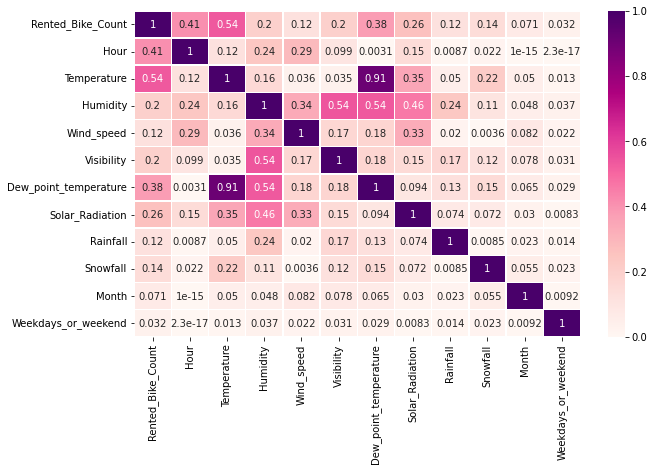

In [59]:
# lets check the correlation between variables by using heatmap.
plt.figure(figsize=(10,6))
sns.heatmap(data=abs(Bike_data.corr()),annot=True,cmap="RdPu",linewidth=.5)

As we can see that the  temperature and Dew_point_temperature are highly correlated variable so we will drop one of them  in modeling section.
